# Import librairies

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import seaborn as sns
from statsmodels.tsa.seasonal import STL
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

# Import dataset

In [21]:
df_trafic = pd.read_parquet('/Users/manu/Desktop/SUP/Projet 2/AI_model_urban_mobility/data/df_final_15min_NoNan_20250505.parquet')

In [22]:
df_trafic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1880739 entries, 0 to 1880738
Data columns (total 57 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   nom_du_troncon          object        
 1   heure_arrondie          datetime64[ns]
 2   id_technique            object        
 3   id                      object        
 4   debit                   float64       
 5   longueur                float64       
 6   taux_occupation         float64       
 7   code_couleur            float64       
 8   etat_du_trafic          object        
 9   temps_de_parcours       float64       
 10  vitesse                 float64       
 11  geo_point_2d            object        
 12  geometrie               object        
 13  shape_geo               object        
 14  horodatage              datetime64[ns]
 15  type_geo                object        
 16  coordinates_geo         object        
 17  horodatage_date         datetime64[ns]
 18  jo

In [23]:
df_trafic['heure_arrondie_index'] = df_trafic['heure_arrondie']  # copier la colonne
df = df_trafic.set_index('heure_arrondie_index')

In [24]:
df_trafic.columns

Index(['nom_du_troncon', 'heure_arrondie', 'id_technique', 'id', 'debit',
       'longueur', 'taux_occupation', 'code_couleur', 'etat_du_trafic',
       'temps_de_parcours', 'vitesse', 'geo_point_2d', 'geometrie',
       'shape_geo', 'horodatage', 'type_geo', 'coordinates_geo',
       'horodatage_date', 'jour', 'is_vacances', 'is_ferie',
       'rounded_horodatage', 'date', 'temperature_2m', 'visibility',
       'precipitation', 'wind_speed_10m', 'gml_id', 'date_ech', 'code_qual',
       'lib_qual', 'coul_qual', 'date_dif', 'source', 'type_zone', 'code_zone',
       'lib_zone', 'code_no2', 'code_so2', 'code_o3', 'code_pm10', 'code_pm25',
       'x_wgs84', 'y_wgs84', 'x_reg', 'y_reg', 'epsg_reg', 'etat_indice',
       'geom_type', 'geom_coordinates', 'geo_point_2d_lon', 'geo_point_2d_lat',
       'has_event_near_troncon', 'weekday', 'hour', 'minute', 'troncon_enc',
       'heure_arrondie_index'],
      dtype='object')

In [25]:
df_trafic.head()

,nom_du_troncon,heure_arrondie,id_technique,id,debit,longueur,taux_occupation,code_couleur,etat_du_trafic,temps_de_parcours,...,geom_type,geom_coordinates,geo_point_2d_lon,geo_point_2d_lat,has_event_near_troncon,weekday,hour,minute,troncon_enc,heure_arrondie_index
0,3 Continents I,2025-02-16 20:15:00,5149-2025-02-16T20:15:00,5149,240.0,478.0,2.900000,3.0,Fluide,85.00,...,Feature,"[[[[-1.532422818, 47.295023199], [-1.527218409...",-1.548206,47.232044,False,6,20,15,0,2025-02-16 20:15:00
1,3 Continents I,2025-02-16 20:30:00,5149-2025-02-16T20:30:00,5149,180.0,478.0,1.600000,3.0,Fluide,81.00,...,Feature,"[[[[-1.532422818, 47.295023199], [-1.527218409...",-1.548206,47.232044,False,6,20,30,0,2025-02-16 20:30:00
2,3 Continents I,2025-02-16 20:45:00,5149-2025-02-16T20:45:00,5149,60.0,478.0,2.000000,3.0,Fluide,84.00,...,Feature,"[[[[-1.532422818, 47.295023199], [-1.527218409...",-1.548206,47.232044,False,6,20,45,0,2025-02-16 20:45:00
3,3 Continents I,2025-02-16 21:00:00,5149-2025-02-16T21:00:00,5149,240.0,478.0,2.900000,3.0,Fluide,83.00,...,Feature,"[[[[-1.532422818, 47.295023199], [-1.527218409...",-1.548206,47.232044,False,6,21,0,0,2025-02-16 21:00:00
4,3 Continents I,2025-02-16 21:15:00,nan-2025-02-16T21:15:00,nan,235.0,478.0,2.841667,3.0,Fluide,82.62,...,Feature,"[[[[-1.532422818, 47.295023199], [-1.527218409...",-1.548206,47.232044,False,6,21,15,0,2025-02-16 21:15:00


In [26]:
df_trafic.columns

Index(['nom_du_troncon', 'heure_arrondie', 'id_technique', 'id', 'debit',
       'longueur', 'taux_occupation', 'code_couleur', 'etat_du_trafic',
       'temps_de_parcours', 'vitesse', 'geo_point_2d', 'geometrie',
       'shape_geo', 'horodatage', 'type_geo', 'coordinates_geo',
       'horodatage_date', 'jour', 'is_vacances', 'is_ferie',
       'rounded_horodatage', 'date', 'temperature_2m', 'visibility',
       'precipitation', 'wind_speed_10m', 'gml_id', 'date_ech', 'code_qual',
       'lib_qual', 'coul_qual', 'date_dif', 'source', 'type_zone', 'code_zone',
       'lib_zone', 'code_no2', 'code_so2', 'code_o3', 'code_pm10', 'code_pm25',
       'x_wgs84', 'y_wgs84', 'x_reg', 'y_reg', 'epsg_reg', 'etat_indice',
       'geom_type', 'geom_coordinates', 'geo_point_2d_lon', 'geo_point_2d_lat',
       'has_event_near_troncon', 'weekday', 'hour', 'minute', 'troncon_enc',
       'heure_arrondie_index'],
      dtype='object')

In [27]:
df_trafic['jour'].unique()

array(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
       'Saturday'], dtype=object)

In [28]:
df_trafic['is_weekend'] = df_trafic['jour'].apply(lambda x : 1 if x in ['Saturday', 'Sunday'] else 0)

# Exploration

## Taux d’occupation moyen par heure Vacances vs Hors Vacances et Semaine vs Week-end

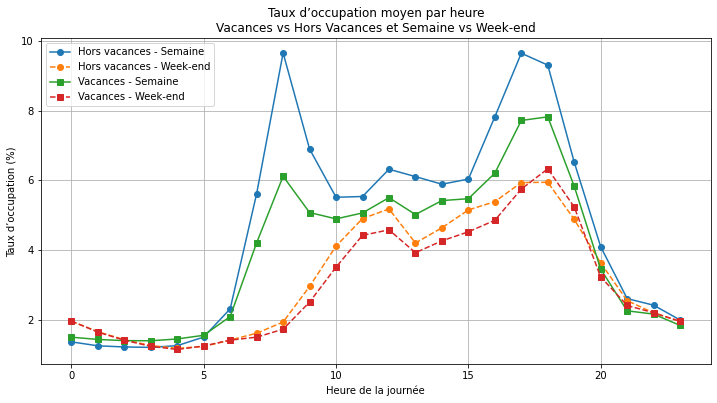

In [29]:
# Moyenne par heure, selon vacances et week-end :
mean_hour = df_trafic.groupby(['hour', 'is_vacances', 'is_weekend'])['taux_occupation'].mean().reset_index()

# Plot
plt.figure(figsize=(12, 6))

# Hors vacances - semaine
plt.plot(
    mean_hour[(mean_hour['is_vacances'] == 0) & (mean_hour['is_weekend'] == 0)]['hour'],
    mean_hour[(mean_hour['is_vacances'] == 0) & (mean_hour['is_weekend'] == 0)]['taux_occupation'],
    label='Hors vacances - Semaine',
    linestyle='-', marker='o'
)

# Hors vacances - week-end
plt.plot(
    mean_hour[(mean_hour['is_vacances'] == 0) & (mean_hour['is_weekend'] == 1)]['hour'],
    mean_hour[(mean_hour['is_vacances'] == 0) & (mean_hour['is_weekend'] == 1)]['taux_occupation'],
    label='Hors vacances - Week-end',
    linestyle='--', marker='o'
)

# Vacances - semaine
plt.plot(
    mean_hour[(mean_hour['is_vacances'] == 1) & (mean_hour['is_weekend'] == 0)]['hour'],
    mean_hour[(mean_hour['is_vacances'] == 1) & (mean_hour['is_weekend'] == 0)]['taux_occupation'],
    label='Vacances - Semaine',
    linestyle='-', marker='s'
)

# Vacances - week-end
plt.plot(
    mean_hour[(mean_hour['is_vacances'] == 1) & (mean_hour['is_weekend'] == 1)]['hour'],
    mean_hour[(mean_hour['is_vacances'] == 1) & (mean_hour['is_weekend'] == 1)]['taux_occupation'],
    label='Vacances - Week-end',
    linestyle='--', marker='s'
)

plt.title('Taux d’occupation moyen par heure\nVacances vs Hors Vacances et Semaine vs Week-end')
plt.xlabel('Heure de la journée')
plt.ylabel('Taux d’occupation (%)')
plt.legend()
plt.grid(True)
plt.show()


### Conclusion

1 - Hors vacances en semaine (courbe bleue) :
On observe 2 pics, un le matin entre 7h et 9h et un le soir entre 16h et 19h.
2 - Hors vacances en week-end (courbe orange) :
Plus 'plat' sans pic de circulation.
Creux le matin aux horaires de pic de la semaine
3 - En vacances en semaine (courbe verte) :
Suit le même schéma qu'hors vacances mais avec un taux d'occupation moyen plus faible
4 - En vacances en week-end (courbe rouge) :
Très similaires à la même courbe hors vacances.

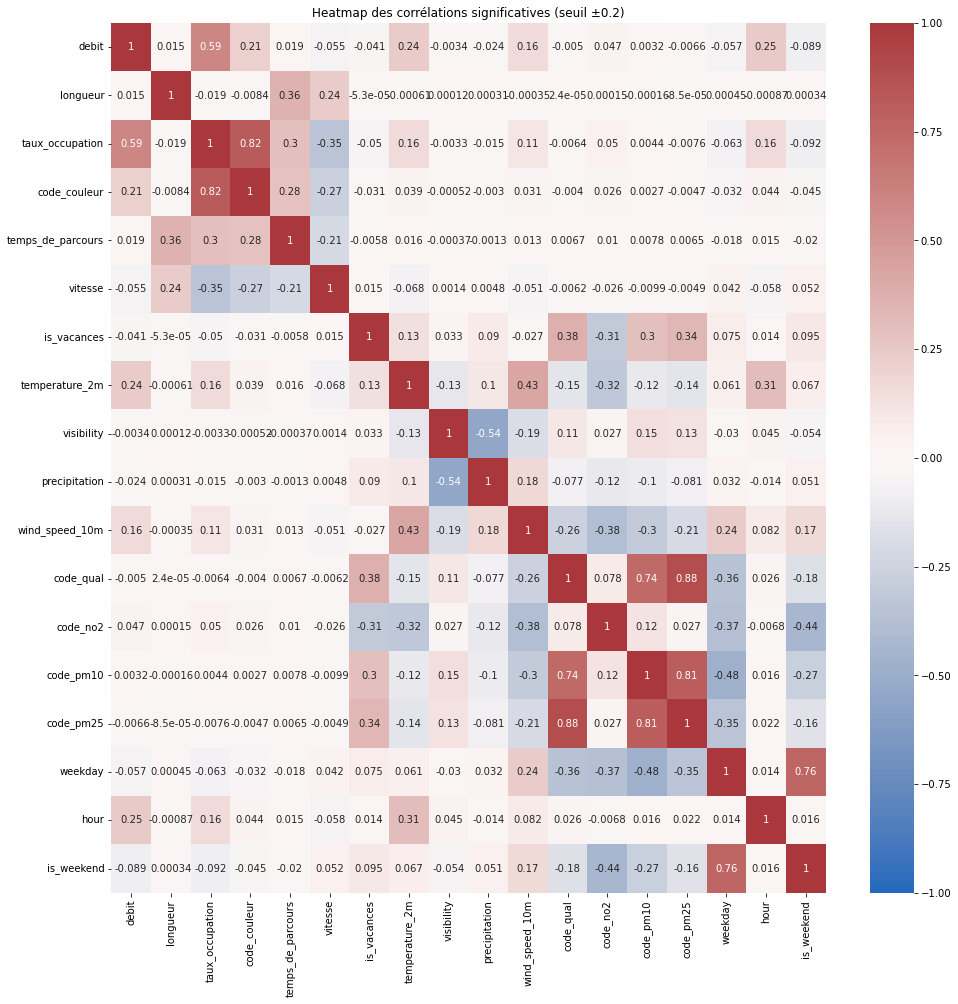

In [30]:
# 1. Garder uniquement les variables numériques
df_num = df_trafic.select_dtypes('number')

# 2. Matrice de corrélation
corr = df_num.corr()

# 3. Supprimer les variables dont TOUTES les corrélations (hors diagonale) sont faibles
threshold = 0.2  # valeur minimale à considérer comme "corrélé"
mask = (corr.abs() > threshold)  # booléen

# Supprimer les lignes/colonnes qui n'ont aucune forte corrélation (hors diagonale)
filtered_vars = mask.sum(axis=1) > 1  # >1 pour exclure la diagonale
corr_filtered = corr.loc[filtered_vars, filtered_vars]

# 4. Affichage
plt.figure(figsize=(16, 16))
sns.heatmap(corr_filtered,
            cmap="vlag",
            center=0,
            annot=True,
            vmin=-1,
            vmax=1)
plt.title("Heatmap des corrélations significatives (seuil ±0.2)")
plt.show()


## Saisonnalité

In [43]:
def analyse_serie_temporelle(df, col='taux_occupation', troncon=None, period=96):
    """
    Analyse complète d'une série temporelle :
    - STL : saisonnalité + tendance + résidu
    - ACF : autocorrélation
    - ADF : test de stationnarité

    Args:
        df: DataFrame contenant les données temporelles avec un index heure_arrondie.
        col: Nom de la colonne à analyser.
        troncon: Nom du tronçon si analyse locale (sinon global).
        period: Période saisonnière (96 = 1 jour à 15 min).

    Returns:
        Résultat de la décomposition STL.
    """

    df = df.copy()

    if troncon:
        serie = df[df['nom_du_troncon'] == troncon].copy()
        title = f"{col} – {troncon}"
    else:
        serie = df.copy()
        title = f"{col} – moyenne globale"

    # Préparer la série
    serie = serie.set_index('heure_arrondie').sort_index()
    serie = serie[col].groupby(level=0).mean()
    serie = serie.dropna()

    # Décomposition STL
    stl = STL(serie, period=period).fit()

    # Plot STL personnalisé
    fig, axes = plt.subplots(4, 1, figsize=(14, 10), sharex=True)
    axes[0].plot(serie, label="Observed")
    axes[0].set_ylabel("Observed")
    axes[1].plot(stl.trend, color='orange', label="Trend")
    axes[1].set_ylabel("Trend")
    axes[2].plot(stl.seasonal, color='green', label="Seasonal")
    axes[2].set_ylabel("Seasonal")
    axes[3].plot(stl.resid, color='red', label="Residual")
    axes[3].set_ylabel("Residual")

    for ax in axes:
        ax.legend()
    plt.suptitle(f"Décomposition STL – {title}")
    plt.tight_layout()
    plt.show()

    # Plot ACF
    plot_acf(serie, lags=period * 7)
    plt.title(f"Autocorrélation – {title}")
    plt.show()

    # Test de stationnarité ADF
    adf_stat, p_value, *_ = adfuller(serie.dropna())
    print(f"ADF Statistic : {adf_stat:.4f}")
    print(f"p-value       : {p_value:.4f}")
    if p_value < 0.05:
        print("La série est stationnaire")
    else:
        print("La série n'est PAS stationnaire")

    return stl


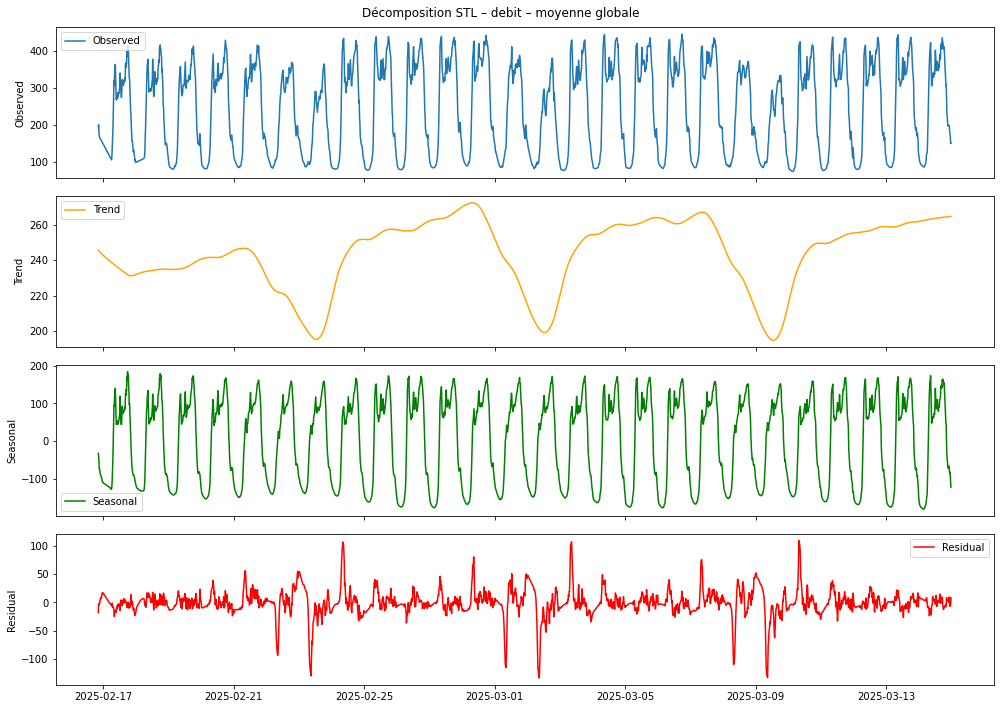

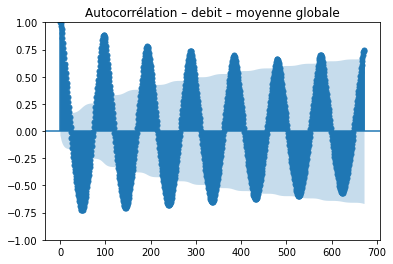

ADF Statistic : -10.6998
p-value       : 0.0000
La série est stationnaire


In [44]:
analyse_serie_temporelle(df_trafic, col='debit')

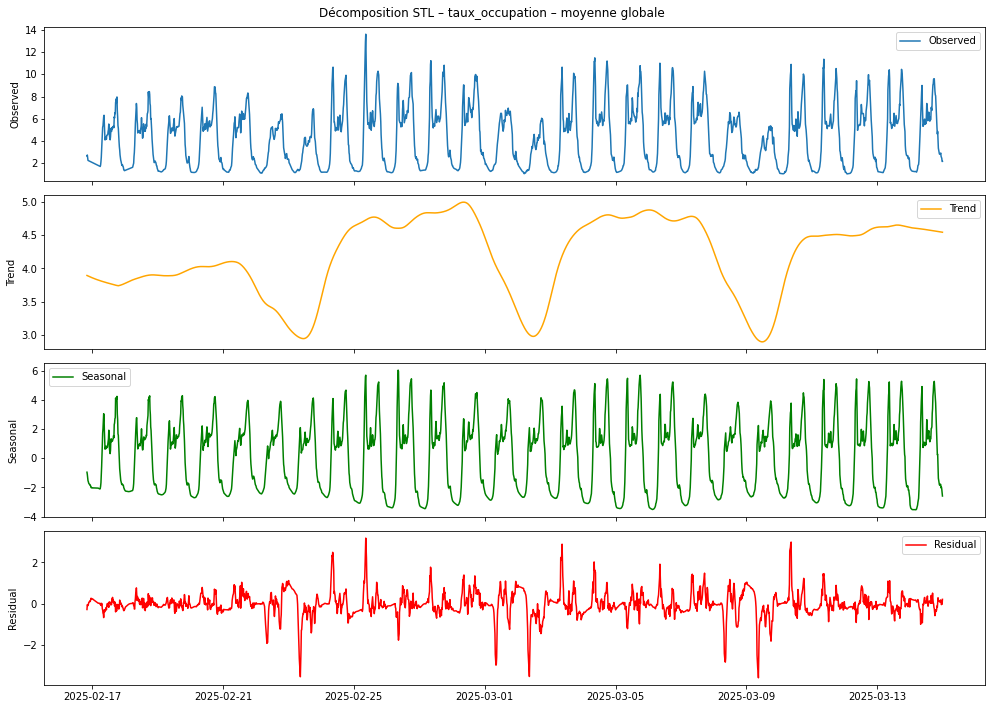

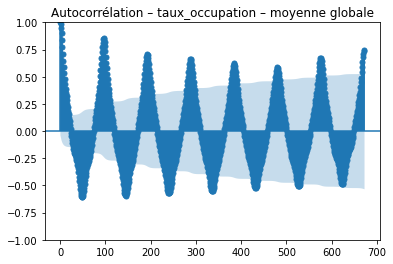

ADF Statistic : -8.5970
p-value       : 0.0000
La série est stationnaire


In [45]:
analyse_serie_temporelle(df_trafic, col='taux_occupation')